#Benefits of Pandas' categorical data type. (ref: https://safjan.com/)

## 1. Memory efficiency

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Create a large DataFrame with repeated values
df = pd.DataFrame({'status': np.random.choice(['active', 'inactive', 'pending'], 1000000)})

# Compare memory usage
print(f"String dtype: {df['status'].memory_usage(deep=True) / 1e6:.2f} MB")
print(f"Categorical dtype: {df['status'].astype('category').memory_usage(deep=True) / 1e6:.2f} MB")

String dtype: 64.00 MB
Categorical dtype: 1.00 MB


##2. Improved performance

In [ ]:
import time

# Create a large DataFrame with repeated values
df = pd.DataFrame({'color': np.random.choice(['red', 'green', 'blue', 'yellow'], 1000000)})

# Compare performance for value_counts()
start = time.time()
df['color'].value_counts()
print(f"String dtype: {time.time() - start:.4f} seconds")

df['color'] = df['color'].astype('category')
start = time.time()
df['color'].value_counts()
print(f"Categorical dtype: {time.time() - start:.4f} seconds")

String dtype: 0.1056 seconds
Categorical dtype: 0.0045 seconds


###3. Can create a meaningful order.

<bound method DataFrame.sort_values of      size
0   small
1  medium
2   large
3   small
4   large
5  medium>


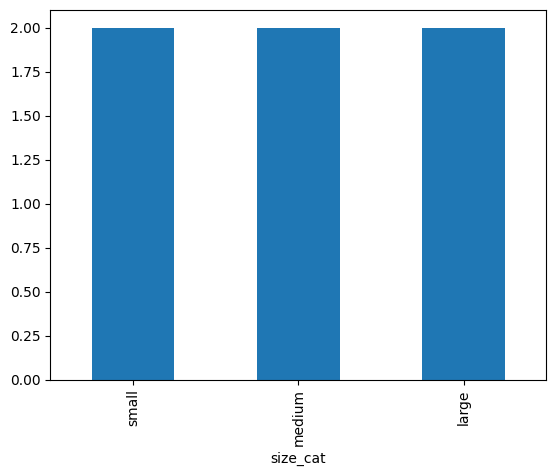

In [ ]:
import matplotlib.pyplot as plt
df = pd.DataFrame({'size': ['small', 'medium', 'large', 'small', 'large', 'medium']})
print(df.sort_values)
# Create an ordered categorical column
df['size_cat'] = pd.Categorical(df['size'], categories=['small', 'medium', 'large'], ordered=True)

# Sort by the categorical column
#print(df.sort_values('size_cat'))

# Plot with a meaningful order
df['size_cat'].value_counts().plot(kind='bar')
plt.show()

##4. **Type safety**: Categorical data ensures that only predefined categories can be assigned, preventing data entry errors.

In [ ]:
df = pd.DataFrame({'fruit': ['apple', 'banana', 'cherry']})
#df['fruit'] = pd.Categorical(df['fruit'], categories=['apple', 'banana', 'cherry'])

df.loc[3,'fruit'] = 'orange'
print(df)


    fruit
0   apple
1  banana
2  cherry
3  orange


##5. Improved groupby operations

In [ ]:
# Create a large DataFrame with repeated values
df = pd.DataFrame({
    'group': np.random.choice(['A', 'B', 'C', 'D', 'E'], 1000000),
    'value': np.random.randn(1000000)
})

# Compare performance for groupby operation
start = time.time()
df.groupby('group')['value'].mean()
print(f"String dtype: {time.time() - start:.4f} seconds")

df['group'] = df['group'].astype('category')
start = time.time()
df.groupby('group')['value'].mean()
print(f"Categorical dtype: {time.time() - start:.4f} seconds")

String dtype: 0.0811 seconds
Categorical dtype: 0.0118 seconds


<ipython-input-7-fae6984682f0>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('group')['value'].mean()


In [ ]:
df = pd.DataFrame({'A': [1, 2], 'B': [3.1, 4.2]})
df.attrs = {"A": "Integer", "B":"Float"}
df.attrs

{'A': 'Integer', 'B': 'Float'}